In [1]:
import pandas as pd

In [2]:
mvps = pd.read_csv("mvps.csv")

In [3]:
mvps = mvps[["Player", "year", "Pts Won", "Pts Max", "Share"]] # all other data is in players.csv

In [4]:
mvps

,Player,year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148
...,...,...,...,...,...
481,Stephen Curry,2022,4.0,1000,0.004
482,Chris Paul,2022,2.0,1000,0.002
483,DeMar DeRozan,2022,1.0,1000,0.001
484,Kevin Durant,2022,1.0,1000,0.001


In [5]:
players = pd.read_csv("players.csv")
del players["Unnamed: 0"]
del players["Rk"]

In [6]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
18881,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
18882,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
18883,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [7]:
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In [8]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [9]:
players.groupby(["Player", "year"]).get_group(("Greg Anderson", 1991))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [10]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = "WAS" # takes the team from last row (-1), and make that as team 
        return row

players = players.groupby(["Player", "year"]).apply(single_row)

In [11]:
players

Player Pos Age   Tm   G  GS    MP   FG  \
Player         year                                                        
A.C. Green     1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   
               1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   
               1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   
               1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7   
               1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   
...                                  ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002 6095  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003 6595  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004 7176  Željko Rebrača   C  31  WAS  24   2  11.4  1.4   
               2005 7776  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006 8370  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                           FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         year                   ...                                      
A.C. Green     1991 164    6.6  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
               1992 633    9.8  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
               1993 1092   8.6  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
               1994 1579  11.3  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
               1995 2067   7.5  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
...                        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 6095   5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 6595   4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 7176   3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 7776   4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 8370   3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  year  
Player         year                        
A.C. Green     1991 164   1.4   9.1  1991  
               1992 633   1.7  13.6  1992  
               1993 1092  1.8  12.8  1993  
               1994 1579  1.7  14.7  1994  
               1995 2067  1.8  11.2  1995  
...                       ...   ...   ...  
Željko Rebrača 2002 6095  2.6   6.9  2002  
               2003 6595  2.6   6.6  2003  
               2004 7176  2.2   3.8  2004  
               2005 7776  2.2   5.8  2005  
               2006 8370  2.0   4.7  2006  

[14697 rows x 30 columns]

In [12]:
players.index = players.index.droplevel()

In [13]:
players

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
year,,,,,,,,,,,,,,,,,,,,,,
1991,164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1992,633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1993,1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1994,1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
1995,2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,6095,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
2003,6595,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
2004,7176,Željko Rebrača,C,31,WAS,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004


In [14]:
players.index = players.index.droplevel()

In [15]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
6595,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7176,Željko Rebrača,C,31,WAS,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7776,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [16]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
8,Greg Anderson,PF,26,WAS,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [17]:
combined = players.merge(mvps, how="outer", on=["Player", "year"])

In [18]:
combined[combined["Player"] =="Stephen Curry"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share
12853,Stephen Curry,PG,21,GSW,80,77,36.2,6.6,14.3,.462,...,5.9,1.9,0.2,3.0,3.2,17.5,2010,NaN,NaN,NaN
12854,Stephen Curry,PG,22,GSW,74,74,33.6,6.8,14.2,.480,...,5.8,1.5,0.3,3.1,3.1,18.6,2011,NaN,NaN,NaN
12855,Stephen Curry,PG,23,GSW,26,23,28.2,5.6,11.4,.490,...,5.3,1.5,0.3,2.5,2.4,14.7,2012,NaN,NaN,NaN
12856,Stephen Curry,PG,24,GSW,78,78,38.2,8.0,17.8,.451,...,6.9,1.6,0.2,3.1,2.5,22.9,2013,3.0,1210.0,0.002
12857,Stephen Curry,PG,25,GSW,78,78,36.5,8.4,17.7,.471,...,8.5,1.6,0.2,3.8,2.5,24.0,2014,66.0,1250.0,0.053
12858,Stephen Curry,PG,26,GSW,80,80,32.7,8.2,16.8,.487,...,7.7,2.0,0.2,3.1,2.0,23.8,2015,1198.0,1300.0,0.922
12859,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,.504,...,6.7,2.1,0.2,3.3,2.0,30.1,2016,1310.0,1310.0,1.000
12860,Stephen Curry,PG,28,GSW,79,79,33.4,8.5,18.3,.468,...,6.6,1.8,0.2,3.0,2.3,25.3,2017,52.0,1010.0,0.051
12861,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,.495,...,6.1,1.6,0.2,3.0,2.2,26.4,2018,5.0,1010.0,0.005
12862,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,5.2,1.3,0.4,2.8,2.4,27.3,2019,175.0,1010.0,0.173


In [19]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [20]:
combined[combined["Player"] == "Stephen Curry"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share
12853,Stephen Curry,PG,21,GSW,80,77,36.2,6.6,14.3,.462,...,5.9,1.9,0.2,3.0,3.2,17.5,2010,0.0,0.0,0.000
12854,Stephen Curry,PG,22,GSW,74,74,33.6,6.8,14.2,.480,...,5.8,1.5,0.3,3.1,3.1,18.6,2011,0.0,0.0,0.000
12855,Stephen Curry,PG,23,GSW,26,23,28.2,5.6,11.4,.490,...,5.3,1.5,0.3,2.5,2.4,14.7,2012,0.0,0.0,0.000
12856,Stephen Curry,PG,24,GSW,78,78,38.2,8.0,17.8,.451,...,6.9,1.6,0.2,3.1,2.5,22.9,2013,3.0,1210.0,0.002
12857,Stephen Curry,PG,25,GSW,78,78,36.5,8.4,17.7,.471,...,8.5,1.6,0.2,3.8,2.5,24.0,2014,66.0,1250.0,0.053
12858,Stephen Curry,PG,26,GSW,80,80,32.7,8.2,16.8,.487,...,7.7,2.0,0.2,3.1,2.0,23.8,2015,1198.0,1300.0,0.922
12859,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,.504,...,6.7,2.1,0.2,3.3,2.0,30.1,2016,1310.0,1310.0,1.000
12860,Stephen Curry,PG,28,GSW,79,79,33.4,8.5,18.3,.468,...,6.6,1.8,0.2,3.0,2.3,25.3,2017,52.0,1010.0,0.051
12861,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,.495,...,6.1,1.6,0.2,3.0,2.2,26.4,2018,5.0,1010.0,0.005
12862,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,5.2,1.3,0.4,2.8,2.4,27.3,2019,175.0,1010.0,0.173


In [21]:
teams = pd.read_csv("teams.csv")

In [22]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [24]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [23]:
teams = teams[~teams["W"].str.contains("Division")] 

In [24]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks*


In [25]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False) 

/var/folders/7z/0kv_9f_91cn42wfl7s9v8xcr0000gn/T/ipykernel_82515/390097362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "", regex=False)


In [26]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [27]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [28]:
combined["Tm"].unique()

array(['LAL', 'PHO', 'WAS', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW',
       'IND', 'MIN', 'BOS', 'HOU', 'ORL', 'DEN', 'NOH', 'TOR', 'CHO',
       'PHI', 'POR', 'OKC', 'UTA', 'MIL', 'SEA', 'NJN', 'LAC', 'ATL',
       'CHA', 'SAC', 'NYK', 'NOP', 'BRK', 'DET', 'SAS', 'MEM', 'CHH',
       'VAN', 'NOK'], dtype=object)

In [29]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines:
        ab, name = line.replace("\n", "").split(",")
        nicknames[ab] = name

In [30]:
combined["Team"] = combined["Tm"].map(nicknames)

In [34]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


In [33]:
combined.rename(columns={'year': 'Year'}, inplace=True)

In [35]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])

In [36]:
del stats["Unnamed: 0"]

In [37]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Jordan McLaughlin,PG,23,MIN,30,2,19.7,2.9,5.9,.489,...,0.0,0.0,Minnesota Timberwolves,19,45,.297,22.5,113.3,117.5,-4.02
14693,Josh Okogie,SG,21,MIN,62,28,25.0,2.7,6.4,.427,...,0.0,0.0,Minnesota Timberwolves,19,45,.297,22.5,113.3,117.5,-4.02
14694,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,.508,...,0.0,0.0,Minnesota Timberwolves,19,45,.297,22.5,113.3,117.5,-4.02
14695,Kelan Martin,SF,24,MIN,31,4,16.0,2.3,5.8,.392,...,0.0,0.0,Minnesota Timberwolves,19,45,.297,22.5,113.3,117.5,-4.02


In [38]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [39]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [40]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [45]:
stats["GB"].unique()

array([ 5. , 14. , 23. ,  7. ,  0. , 42. , 18. ,  6. , 24. , 26. , 37. ,
       29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. , 35. , 10. ,  3. ,
       15. ,  9. ,  2. , 20. , 11. , 33. , 16. , 41. , 12. , 30. , 34. ,
        4. ,  1.5, 22. , 51. , 39. , 40. , 18.5, 31. , 48. , 17. , 46. ,
       10.5, 32. , 38. , 27. , 50. , 43. , 45. , 25.5, 36. ,  3.5, 20.5,
       11.5, 44. , 52. , 56. ,  2.5, 12.5, 32.5, 21.5,  4.5, 47. , 22.5])

In [42]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [43]:
stats["GB"] = stats["GB"].fillna(0)

In [44]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [46]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [47]:
stats.to_csv("mvp_players_teams.csv")

In [48]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending = False).head(10)

<AxesSubplot:xlabel='Player'>

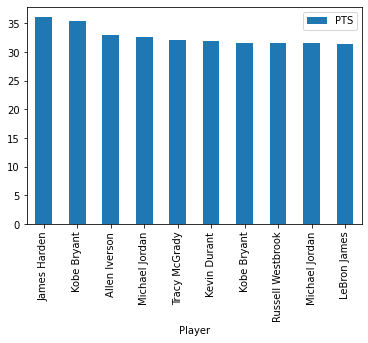

In [49]:
highest_scoring.plot.bar("Player", "PTS")

In [50]:
highest_scorer_per_yr = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<AxesSubplot:xlabel='Player'>

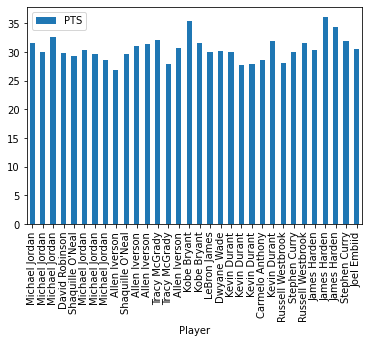

In [52]:
highest_scorer_per_yr.plot.bar("Player", "PTS")

In [57]:
top_player = stats[(stats["W"] > 50) & (stats["PTS"] > 25)].sort_values("PTS", ascending = False).head(10)
top_player


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
13197,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
10305,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
6710,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
10282,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
1500,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56.0,26.0,0.683,0.0,94.7,90.4,3.64
1189,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,...,1000.0,0.706,Philadelphia 76ers,51.0,31.0,0.622,0.0,109.9,107.3,2.57
10884,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1368,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,...,1010.0,0.955,Houston Rockets,65.0,17.0,0.793,0.0,112.4,103.9,8.21
6500,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,0.504,...,1310.0,1.000,Golden State Warriors,73.0,9.0,0.890,0.0,114.9,104.1,10.38
10294,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07


<AxesSubplot:xlabel='Player'>

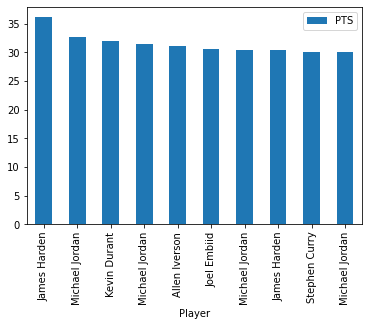

In [58]:
top_player.plot.bar("Player", "PTS")

In [59]:
stats.corr()["Share"]

Age        0.018420
G          0.089176
GS         0.167169
MP         0.160854
FG         0.275277
FGA        0.247570
FG%        0.065081
3P         0.093106
3PA        0.093229
3P%        0.013697
2P         0.276305
2PA        0.251837
2P%        0.060965
eFG%       0.057892
FT         0.317906
FTA        0.323022
FT%        0.037299
ORB        0.102755
DRB        0.216642
TRB        0.189423
AST        0.199825
STL        0.173410
BLK        0.154909
TOV        0.233015
PF         0.072800
PTS        0.287185
Year      -0.009141
Pts Won    0.994986
Pts Max    0.522075
Share      1.000000
W          0.125774
L         -0.125223
W/L%       0.129978
GB        -0.098653
PS/G       0.041596
PA/G      -0.040958
SRS        0.126267
Name: Share, dtype: float64

In [60]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Jordan McLaughlin,PG,23,MIN,30,2,19.7,2.9,5.9,0.489,...,0.0,0.0,Minnesota Timberwolves,19.0,45.0,0.297,22.5,113.3,117.5,-4.02
14693,Josh Okogie,SG,21,MIN,62,28,25.0,2.7,6.4,0.427,...,0.0,0.0,Minnesota Timberwolves,19.0,45.0,0.297,22.5,113.3,117.5,-4.02
14694,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,0.508,...,0.0,0.0,Minnesota Timberwolves,19.0,45.0,0.297,22.5,113.3,117.5,-4.02
14695,Kelan Martin,SF,24,MIN,31,4,16.0,2.3,5.8,0.392,...,0.0,0.0,Minnesota Timberwolves,19.0,45.0,0.297,22.5,113.3,117.5,-4.02


In [61]:
stats[["3P%", "W", "L", "W/L%", "GB", "PS/G", "PA/G", "SRS"]] = stats[["3P%", "W", "L","W/L%", "GB", "PS/G", "PA/G", "SRS"]].fillna(0)

In [62]:
stats.to_csv("players_teams_mvps_stats_final.csv")

In [63]:
stats[stats["Player"] == "LeBron James"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
3993,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17
4473,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,...,1010.0,0.001,Los Angeles Lakers,37.0,45.0,0.451,20.0,111.8,113.5,-1.33
4491,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,...,1010.0,0.746,Los Angeles Lakers,52.0,19.0,0.732,0.0,113.4,107.6,6.28
4504,LeBron James,PG,36,LAL,45,45,33.4,9.4,18.3,0.513,...,1010.0,0.001,Los Angeles Lakers,42.0,30.0,0.583,9.0,109.5,106.8,2.77
4576,LeBron James,SF,30,CLE,69,69,36.1,9.0,18.5,0.488,...,1300.0,0.425,Cleveland Cavaliers,53.0,29.0,0.646,0.0,103.1,98.7,4.08
6008,LeBron James,SF,20,CLE,80,80,42.4,9.9,21.1,0.472,...,1270.0,0.073,Cleveland Cavaliers,42.0,40.0,0.512,12.0,96.5,95.7,0.27
6025,LeBron James,SF,22,CLE,78,78,40.9,9.9,20.8,0.476,...,1290.0,0.142,Cleveland Cavaliers,50.0,32.0,0.610,3.0,96.8,92.9,3.33
6038,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,0.484,...,1260.0,0.348,Cleveland Cavaliers,45.0,37.0,0.549,14.0,96.4,96.7,-0.53
6048,LeBron James,SF,24,CLE,81,81,37.7,9.7,19.9,0.489,...,1210.0,0.969,Cleveland Cavaliers,66.0,16.0,0.805,0.0,100.3,91.4,8.68
6064,LeBron James,SF,25,CLE,76,76,39.0,10.1,20.1,0.503,...,1230.0,0.980,Cleveland Cavaliers,61.0,21.0,0.744,0.0,102.1,95.6,6.17


In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [70]:
stats[stats["Player"] == "Klay Thompson"].sort_values("3P", ascending = False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
6560,Klay Thompson,SG,31,GSW,32,32,29.4,7.7,17.9,0.429,3.6,9.3,0.385,4.1,8.7,0.477,0.529,1.4,1.6,0.902,0.5,3.4,3.9,2.8,0.5,0.5,1.3,1.7,20.4,2022,0.0,0.0,0.000,Golden State Warriors,53.0,29.0,0.646,11.0,111.0,105.5,5.52
6496,Klay Thompson,SG,25,GSW,80,80,33.3,8.1,17.3,0.470,3.5,8.1,0.425,4.7,9.2,0.510,0.569,2.4,2.8,0.873,0.4,3.4,3.8,2.1,0.8,0.6,1.7,1.9,22.1,2016,0.0,0.0,0.000,Golden State Warriors,73.0,9.0,0.890,0.0,114.9,104.1,10.38
6091,Klay Thompson,SG,26,GSW,78,78,34.0,8.3,17.6,0.468,3.4,8.3,0.414,4.8,9.3,0.516,0.565,2.4,2.8,0.853,0.6,3.0,3.7,2.1,0.8,0.5,1.6,1.8,22.3,2017,0.0,0.0,0.000,Golden State Warriors,67.0,15.0,0.817,0.0,115.9,104.3,11.35
4810,Klay Thompson,SG,28,GSW,78,78,34.0,8.4,18.0,0.467,3.1,7.7,0.402,5.3,10.3,0.516,0.553,1.7,2.0,0.816,0.5,3.4,3.8,2.4,1.1,0.6,1.5,2.0,21.5,2019,0.0,0.0,0.000,Golden State Warriors,57.0,25.0,0.695,0.0,117.7,111.2,6.42
6481,Klay Thompson,SG,24,GSW,77,77,31.9,7.8,16.9,0.463,3.1,7.1,0.439,4.7,9.8,0.481,0.555,2.9,3.3,0.879,0.4,2.9,3.2,2.9,1.1,0.8,1.9,1.6,21.7,2015,1.0,1300.0,0.001,Golden State Warriors,67.0,15.0,0.817,0.0,110.0,99.9,10.01
6510,Klay Thompson,SG,27,GSW,73,73,34.3,7.9,16.2,0.488,3.1,7.1,0.440,4.7,9.0,0.526,0.585,1.1,1.3,0.837,0.4,3.4,3.8,2.5,0.8,0.5,1.8,1.6,20.0,2018,0.0,0.0,0.000,Golden State Warriors,58.0,24.0,0.707,0.0,113.5,107.5,5.79
6467,Klay Thompson,SG,23,GSW,81,81,35.4,6.9,15.5,0.444,2.8,6.6,0.417,4.1,8.9,0.464,0.533,1.8,2.3,0.795,0.5,2.6,3.1,2.2,0.9,0.5,1.7,2.9,18.4,2014,0.0,0.0,0.000,Golden State Warriors,51.0,31.0,0.622,6.0,104.3,99.5,5.15
7094,Klay Thompson,SG,22,GSW,82,82,35.8,6.2,14.7,0.422,2.6,6.4,0.401,3.6,8.3,0.437,0.509,1.6,1.9,0.841,0.4,3.3,3.7,2.2,1.0,0.5,1.9,2.9,16.6,2013,0.0,0.0,0.000,Golden State Warriors,47.0,35.0,0.573,9.0,101.2,100.3,1.32
7668,Klay Thompson,SG,21,GSW,66,29,24.4,4.8,10.9,0.443,1.7,4.1,0.414,3.1,6.8,0.460,0.520,1.2,1.4,0.868,0.4,2.1,2.4,2.0,0.7,0.3,1.6,2.3,12.5,2012,0.0,0.0,0.000,Golden State Warriors,23.0,43.0,0.348,18.0,97.8,101.2,-2.79


In [73]:
fifty_fourty_ninety = stats[(stats["FG%"] >= 0.5) & (stats["3P%"] >= 0.4) & (stats["FT%"] >= 0.900)].sort_values("FGA", ascending = False)

In [75]:
fifty_fourty_ninety

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
6500,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,0.504,5.1,11.2,0.454,5.1,9.0,0.566,0.630,4.6,5.1,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,2016,1310.0,1310.0,1.000,Golden State Warriors,73.0,9.0,0.890,0.0,114.9,104.1,10.38
4839,Kyrie Irving,PG,28,BRK,54,54,34.9,10.2,20.1,0.506,2.8,7.0,0.402,7.4,13.1,0.561,0.576,3.7,4.0,0.922,1.0,3.8,4.8,6.0,1.4,0.7,2.4,2.6,26.9,2021,0.0,0.0,0.000,Brooklyn Nets,48.0,24.0,0.667,1.0,118.6,114.1,4.24
14085,Kevin Durant,SF,24,OKC,81,81,38.5,9.0,17.7,0.510,1.7,4.1,0.416,7.3,13.6,0.539,0.559,8.4,9.3,0.905,0.6,7.3,7.9,4.6,1.4,1.3,3.5,1.8,28.1,2013,765.0,1210.0,0.632,Oklahoma City Thunder,60.0,22.0,0.732,0.0,105.7,96.5,9.15
9929,Dirk Nowitzki,PF,28,DAL,78,78,36.2,8.6,17.2,0.502,0.9,2.2,0.416,7.7,15.0,0.515,0.529,6.4,7.1,0.904,1.6,7.3,8.9,3.4,0.7,0.8,2.1,2.2,24.6,2007,1138.0,1290.0,0.882,Dallas Mavericks,67.0,15.0,0.817,0.0,100.0,92.8,7.28
5725,Steve Nash,PG,31,PHO,79,79,35.4,6.8,13.4,0.512,1.9,4.3,0.439,4.9,9.0,0.548,0.583,3.3,3.5,0.921,0.6,3.6,4.2,10.5,0.8,0.2,3.5,1.5,18.8,2006,924.0,1250.0,0.739,Phoenix Suns,54.0,28.0,0.659,0.0,108.4,102.8,5.48
9308,Reggie Miller,SG,28,IND,79,79,33.4,6.6,13.2,0.503,1.6,3.7,0.421,5.1,9.5,0.535,0.562,5.1,5.6,0.908,0.4,2.3,2.7,3.1,1.5,0.3,2.2,2.4,19.9,1994,0.0,0.0,0.000,Indiana Pacers,47.0,35.0,0.573,10.0,101.0,97.5,3.26
5752,Steve Nash,PG,35,PHO,81,81,32.8,6.2,12.2,0.507,1.5,3.6,0.426,4.6,8.6,0.540,0.570,2.6,2.8,0.938,0.4,2.9,3.3,11.0,0.5,0.1,3.6,1.3,16.5,2010,49.0,1230.0,0.040,Phoenix Suns,54.0,28.0,0.659,3.0,110.2,105.3,4.67
4111,Steve Nash,PG,33,PHO,81,81,34.3,6.0,11.9,0.504,2.2,4.7,0.470,3.8,7.2,0.527,0.597,2.7,3.0,0.906,0.3,3.1,3.5,11.1,0.7,0.1,3.6,1.4,16.9,2008,18.0,1260.0,0.014,Phoenix Suns,55.0,27.0,0.671,2.0,110.1,105.0,5.14
11874,Malcolm Brogdon,SG,26,MIL,64,64,28.6,5.9,11.7,0.505,1.6,3.8,0.426,4.3,7.9,0.544,0.575,2.2,2.4,0.928,1.0,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,2019,0.0,0.0,0.000,Milwaukee Bucks,60.0,22.0,0.732,0.0,118.1,109.3,8.04
4121,Steve Nash,PG,34,PHO,74,74,33.6,5.8,11.5,0.503,1.5,3.3,0.439,4.3,8.2,0.529,0.566,2.6,2.8,0.933,0.3,2.8,3.0,9.7,0.7,0.1,3.4,1.5,15.7,2009,0.0,0.0,0.000,Phoenix Suns,46.0,36.0,0.561,19.0,109.4,107.5,1.62
